# Create Dataset

## Create basic Params
Creating the basic dataset attributes.

In [1]:
folder_name = 'ikea_drill_screw'
TRAIN_COUNT = 160
VAL_COUNT = 40
IMAGE_SIZE = 1024
INPUT_PATH = '../datasets/{}/input'.format(folder_name)
VAL_PATH = '../datasets/{}/val'.format(folder_name)
TRAIN_PATH = '../datasets/{}/train'.format(folder_name)
DI_PATH = INPUT_PATH + '/dataset_info.json'

## Create Training Set

In [2]:
MASK_DEF_PATH = TRAIN_PATH + '/mask_definitions.json'
#Generate the images
!python3 ../src/image_composition.py --input_dir {INPUT_PATH} --output_dir {TRAIN_PATH} --count {TRAIN_COUNT} --width {IMAGE_SIZE} --height {IMAGE_SIZE} --silent
#Generate the annotaions json
!python3 ../src/coco_json_utils.py -md {MASK_DEF_PATH} -di {DI_PATH}

../src/image_composition.py:197: UserWarning: file found in foregrounds directory (expected super-category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/.DS_Store
  warnings.warn(f'file found in foregrounds directory (expected super-category directories), ignoring: {super_category_dir}')
../src/image_composition.py:203: UserWarning: file found in super category directory (expected category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store
  warnings.warn(f'file found in super category directory (expected category directories), ignoring: {category_dir}')
../src/image_composition.py:212: UserWarning: foreground must be a .png file, skipping: ../datasets/ikea_drill_screw/input/foregrounds/instruments/screw/.DS_Store
  warnings.warn(f'foreground must be a .png file, skipping: {str(image_file)}')
../src/image_composition.py:237: UserWarning: background must match an accepted type ['.png', '.jpg', '.jpeg'], ignoring: ../data

## Create Validation Set

In [3]:
MASK_DEF_PATH = VAL_PATH + '/mask_definitions.json'
DI_PATH = INPUT_PATH + '/dataset_info.json'
#Generate the images
!python3 ../src/image_composition.py --input_dir {INPUT_PATH} --output_dir {VAL_PATH} --count {VAL_COUNT} --width {IMAGE_SIZE} --height {IMAGE_SIZE} --silent
#Generate the annotaions json
!python3 ../src/coco_json_utils.py -md {MASK_DEF_PATH} -di {DI_PATH}


../src/image_composition.py:197: UserWarning: file found in foregrounds directory (expected super-category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/.DS_Store
  warnings.warn(f'file found in foregrounds directory (expected super-category directories), ignoring: {super_category_dir}')
../src/image_composition.py:203: UserWarning: file found in super category directory (expected category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store
  warnings.warn(f'file found in super category directory (expected category directories), ignoring: {category_dir}')
../src/image_composition.py:212: UserWarning: foreground must be a .png file, skipping: ../datasets/ikea_drill_screw/input/foregrounds/instruments/screw/.DS_Store
  warnings.warn(f'foreground must be a .png file, skipping: {str(image_file)}')
../src/image_composition.py:237: UserWarning: background must match an accepted type ['.png', '.jpg', '.jpeg'], ignoring: ../data

## Preview the generated datasets

In [4]:
import os
import sys
import numpy as np
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  # To find local version of the library
from src import coco_trainer
from mrcnn import visualize


dataset_train = coco_trainer.CocoLikeDataset()
dataset_train.load_data(TRAIN_PATH+'/coco_instances.json',TRAIN_PATH+'/images')
dataset_train.prepare()

dataset_val = coco_trainer.CocoLikeDataset()
dataset_val.load_data(VAL_PATH+'/coco_instances.json',VAL_PATH+'/images')
dataset_val.prepare()

Using TensorFlow backend.


Displaying examples from training dataset:


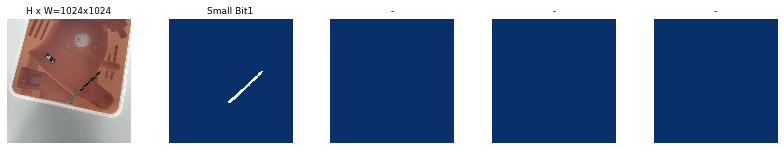

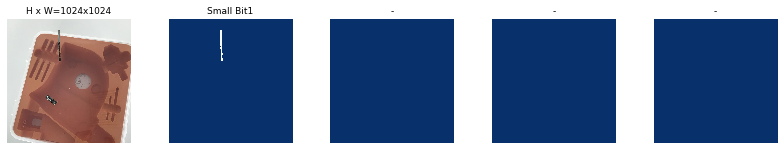

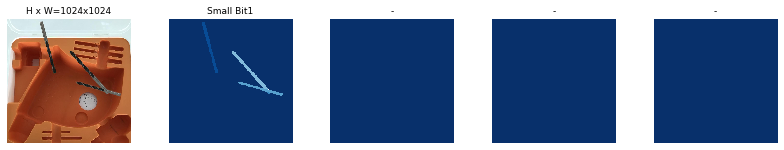

Displaying examples from validation dataset:


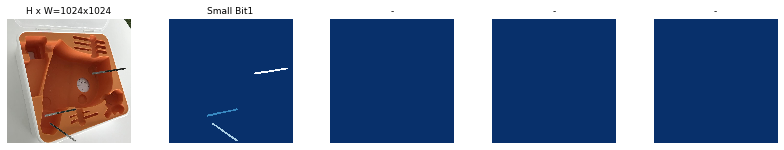

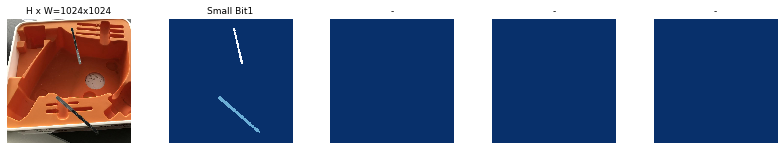

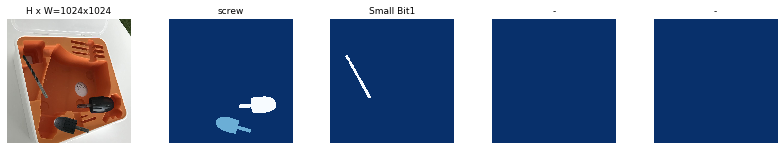

In [5]:
for name, dataset in [('training', dataset_train), ('validation', dataset_val)]:
    print(f'Displaying examples from {name} dataset:')
    
    image_ids = np.random.choice(dataset.image_ids, 3)
    for image_id in image_ids:
        image = dataset.load_image(image_id)
        mask, class_ids = dataset.load_mask(image_id)
        visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## Sync to S3

In [6]:
!aws s3 sync ../datasets s3://dkitdatasets --delete

upload: ../datasets/.DS_Store to s3://dkitdatasets/.DS_Store                        
upload: ../datasets/IKEA_FIXA/.DS_Store to s3://dkitdatasets/IKEA_FIXA/.DS_Store     
upload: ../datasets/box_dataset_synthetic/.DS_Store to s3://dkitdatasets/box_dataset_synthetic/.DS_Store
upload: ../datasets/box_dataset_synthetic/test/.DS_Store to s3://dkitdatasets/box_dataset_synthetic/test/.DS_Store
upload: ../datasets/ikea_drill_screw/input/backgrounds/.DS_Store to s3://dkitdatasets/ikea_drill_screw/input/backgrounds/.DS_Store
upload: ../datasets/ikea_drill_screw/.DS_Store to s3://dkitdatasets/ikea_drill_screw/.DS_Store
delete: s3://dkitdatasets/ikea_drill_screw/input/backgrounds/Image 4.jpeg            
delete: s3://dkitdatasets/ikea_drill_screw/input/backgrounds/Image 6.jpeg            
delete: s3://dkitdatasets/ikea_drill_screw/input/backgrounds/Image 5.jpeg              
upload: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store to s3://dkitdatasets/ikea_drill_screw/input/fo

upload: ../datasets/ikea_drill_screw/old/train/images/00000047.jpg to s3://dkitdatasets/ikea_drill_screw/old/train/images/00000047.jpg
upload: ../datasets/ikea_drill_screw/old/train/images/00000044.jpg to s3://dkitdatasets/ikea_drill_screw/old/train/images/00000044.jpg
upload: ../datasets/ikea_drill_screw/old/train/images/00000048.jpg to s3://dkitdatasets/ikea_drill_screw/old/train/images/00000048.jpg
upload: ../datasets/ikea_drill_screw/old/train/images/00000038.jpg to s3://dkitdatasets/ikea_drill_screw/old/train/images/00000038.jpg
upload: ../datasets/ikea_drill_screw/old/train/images/00000051.jpg to s3://dkitdatasets/ikea_drill_screw/old/train/images/00000051.jpg
upload: ../datasets/ikea_drill_screw/old/train/images/00000045.jpg to s3://dkitdatasets/ikea_drill_screw/old/train/images/00000045.jpg
upload: ../datasets/ikea_drill_screw/old/train/images/00000050.jpg to s3://dkitdatasets/ikea_drill_screw/old/train/images/00000050.jpg
upload: ../datasets/ikea_drill_screw/old/train/images/0

upload: ../datasets/ikea_drill_screw/old/train/images/00000101.jpg to s3://dkitdatasets/ikea_drill_screw/old/train/images/00000101.jpg
upload: ../datasets/ikea_drill_screw/old/train/images/00000100.jpg to s3://dkitdatasets/ikea_drill_screw/old/train/images/00000100.jpg
upload: ../datasets/ikea_drill_screw/old/train/images/00000089.jpg to s3://dkitdatasets/ikea_drill_screw/old/train/images/00000089.jpg
upload: ../datasets/ikea_drill_screw/old/train/images/00000106.jpg to s3://dkitdatasets/ikea_drill_screw/old/train/images/00000106.jpg
upload: ../datasets/ikea_drill_screw/old/train/images/00000092.jpg to s3://dkitdatasets/ikea_drill_screw/old/train/images/00000092.jpg
upload: ../datasets/ikea_drill_screw/old/train/images/00000107.jpg to s3://dkitdatasets/ikea_drill_screw/old/train/images/00000107.jpg
upload: ../datasets/ikea_drill_screw/old/train/images/00000104.jpg to s3://dkitdatasets/ikea_drill_screw/old/train/images/00000104.jpg
upload: ../datasets/ikea_drill_screw/old/train/images/0

upload: ../datasets/ikea_drill_screw/old/train/masks/00000046.png to s3://dkitdatasets/ikea_drill_screw/old/train/masks/00000046.png
upload: ../datasets/ikea_drill_screw/old/train/masks/00000045.png to s3://dkitdatasets/ikea_drill_screw/old/train/masks/00000045.png
upload: ../datasets/ikea_drill_screw/old/train/masks/00000048.png to s3://dkitdatasets/ikea_drill_screw/old/train/masks/00000048.png
upload: ../datasets/ikea_drill_screw/old/train/masks/00000049.png to s3://dkitdatasets/ikea_drill_screw/old/train/masks/00000049.png
upload: ../datasets/ikea_drill_screw/old/train/masks/00000047.png to s3://dkitdatasets/ikea_drill_screw/old/train/masks/00000047.png
upload: ../datasets/ikea_drill_screw/old/train/masks/00000051.png to s3://dkitdatasets/ikea_drill_screw/old/train/masks/00000051.png
upload: ../datasets/ikea_drill_screw/old/train/masks/00000050.png to s3://dkitdatasets/ikea_drill_screw/old/train/masks/00000050.png
upload: ../datasets/ikea_drill_screw/old/train/masks/00000055.png to 

upload: ../datasets/ikea_drill_screw/old/train/masks/00000103.png to s3://dkitdatasets/ikea_drill_screw/old/train/masks/00000103.png
upload: ../datasets/ikea_drill_screw/old/train/masks/00000108.png to s3://dkitdatasets/ikea_drill_screw/old/train/masks/00000108.png
upload: ../datasets/ikea_drill_screw/old/train/masks/00000110.png to s3://dkitdatasets/ikea_drill_screw/old/train/masks/00000110.png
upload: ../datasets/ikea_drill_screw/old/train/masks/00000109.png to s3://dkitdatasets/ikea_drill_screw/old/train/masks/00000109.png
upload: ../datasets/ikea_drill_screw/old/train/masks/00000111.png to s3://dkitdatasets/ikea_drill_screw/old/train/masks/00000111.png
upload: ../datasets/ikea_drill_screw/old/train/masks/00000112.png to s3://dkitdatasets/ikea_drill_screw/old/train/masks/00000112.png
upload: ../datasets/ikea_drill_screw/old/train/masks/00000115.png to s3://dkitdatasets/ikea_drill_screw/old/train/masks/00000115.png
upload: ../datasets/ikea_drill_screw/old/train/masks/00000113.png to 

upload: ../datasets/ikea_drill_screw/old/val/masks/00000025.png to s3://dkitdatasets/ikea_drill_screw/old/val/masks/00000025.png
upload: ../datasets/ikea_drill_screw/old/val/masks/00000027.png to s3://dkitdatasets/ikea_drill_screw/old/val/masks/00000027.png
upload: ../datasets/ikea_drill_screw/old/val/masks/00000029.png to s3://dkitdatasets/ikea_drill_screw/old/val/masks/00000029.png
upload: ../datasets/ikea_drill_screw/old/val/masks/00000026.png to s3://dkitdatasets/ikea_drill_screw/old/val/masks/00000026.png
upload: ../datasets/ikea_drill_screw/old/val/masks/00000028.png to s3://dkitdatasets/ikea_drill_screw/old/val/masks/00000028.png
upload: ../datasets/ikea_drill_screw/test/.DS_Store to s3://dkitdatasets/ikea_drill_screw/test/.DS_Store
upload: ../datasets/ikea_drill_screw/old/val/images/00000014.jpg to s3://dkitdatasets/ikea_drill_screw/old/val/images/00000014.jpg
upload: ../datasets/ikea_drill_screw/train/.DS_Store to s3://dkitdatasets/ikea_drill_screw/train/.DS_Store
upload: ../d

upload: ../datasets/ikea_drill_screw/train/images/00000051.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000051.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000053.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000053.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000055.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000055.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000054.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000054.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000056.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000056.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000058.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000058.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000059.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000059.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000060.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000110.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000110.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000117.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000117.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000116.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000116.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000109.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000109.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000118.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000118.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000119.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000119.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000121.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000121.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000125.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/masks/00000019.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000019.png
upload: ../datasets/ikea_drill_screw/train/masks/00000020.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000020.png
upload: ../datasets/ikea_drill_screw/train/masks/00000023.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000023.png
upload: ../datasets/ikea_drill_screw/train/masks/00000022.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000022.png
upload: ../datasets/ikea_drill_screw/train/masks/00000025.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000025.png
upload: ../datasets/ikea_drill_screw/train/masks/00000021.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000021.png
upload: ../datasets/ikea_drill_screw/train/masks/00000026.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000026.png
upload: ../datasets/ikea_drill_screw/train/images/00000154.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000154.jp

upload: ../datasets/ikea_drill_screw/train/masks/00000089.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000089.png
upload: ../datasets/ikea_drill_screw/train/masks/00000091.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000091.png
upload: ../datasets/ikea_drill_screw/train/masks/00000094.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000094.png
upload: ../datasets/ikea_drill_screw/train/masks/00000093.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000093.png
upload: ../datasets/ikea_drill_screw/train/masks/00000092.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000092.png
upload: ../datasets/ikea_drill_screw/train/masks/00000088.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000088.png
upload: ../datasets/ikea_drill_screw/train/masks/00000095.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000095.png
upload: ../datasets/ikea_drill_screw/train/masks/00000096.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000096.png


upload: ../datasets/ikea_drill_screw/train/masks/00000154.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000154.png
upload: ../datasets/ikea_drill_screw/train/masks/00000158.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000158.png
upload: ../datasets/ikea_drill_screw/train/masks/00000155.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000155.png
upload: ../datasets/ikea_drill_screw/train/masks/00000159.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000159.png
upload: ../datasets/ikea_drill_screw/train/masks/00000157.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000157.png
upload: ../datasets/ikea_drill_screw/val/images/00000000.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000000.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000009.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000009.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000005.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000005.jpg
upload

upload: ../datasets/ikea_drill_screw/val/masks/00000021.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000021.png
upload: ../datasets/ikea_drill_screw/val/masks/00000014.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000014.png
upload: ../datasets/ikea_drill_screw/val/masks/00000025.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000025.png
upload: ../datasets/ikea_drill_screw/val/masks/00000024.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000024.png
upload: ../datasets/ikea_drill_screw/val/masks/00000023.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000023.png
upload: ../datasets/ikea_drill_screw/val/masks/00000029.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000029.png
upload: ../datasets/ikea_drill_screw/val/masks/00000030.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000030.png
upload: ../datasets/ikea_drill_screw/val/masks/00000027.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000027.png
upload: ../datasets/ikea_drill_s